In [1]:
#Importing the modules necessary to open the data, plot, do maps, change from julian dates to gregorian dates
import numpy as np                              #array manipulation and math
from matplotlib import pyplot as plt            #plotting the data
from netCDF4 import Dataset,num2date            #read netcdf
import matplotlib.patches                        
import matplotlib.dates as mpD                  #dates in plots
import cartopy.crs as ccrs                      #mapping module
import cartopy.feature as cfeature              #to put features in a map
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER  #latitude, longitude formats
from datetime import datetime                   #transform dates to python dates
from datetime import timedelta   
import scipy.io as scio

In [ ]:
#to read the eddies from eddy_select: 1 Hanning filter
nc = Dataset('/net/centaure/local/tmp/1/mbarros/EXP1/DET04_1_eddies_r3km_2005M12.nc','r')

In [ ]:
#To see the variables names
print(nc2.variables.keys())

In [ ]:
len(Reddy)

In [ ]:
#to read the SSH data from ROMS simulation
nc2 = Dataset('/data0/project/benguela/BUIC/OUTPUT/R3KM/BENGSAFE_R3KM_V2c_EXTRACTED_eddydetect_fulllong/roms_avg_Y2005M12.nc','r')

In [ ]:
#getting the variables from nc 
lat = nc.variables['lat'][:]
lon = nc.variables['lon'][:] #tem q colocar [:]
vort = nc.variables['Vorticity'][:]
MeanSSH = nc.variables['MeanSSH'][:]
amplitude = nc.variables['Amplitude'][:]
Ueddy = nc.variables['Ueddy'][:]
Leddy = nc.variables['Leddy'][:]
U = nc.variables['U'][:]
V = nc.variables['V'][:]
time = nc.variables['time'][:]
radius = nc.variables['Radius'][:]
ID = nc.variables['ID'][:]
nc.close()

In [ ]:
#lon, lat and f only need to be read once
lon_rho = nc2.variables['lon_rho'][:] #tem q colocar [:]
lat_rho = nc2.variables['lat_rho'][:]
f = nc2.variables['f'][:]
bathy = nc2.variables['h'][:]
zeta = nc2.variables['zeta'][:]
mask_rho = nc2.variables['mask_rho'][:]
pm = nc2.variables['pm'][:]
pn = nc2.variables['pn'][:]
time = nc2.variables['time'][:]
nc2.close()

In [ ]:
#claculating u and v
    
def calc_uev(g,f,zeta,pm,pn,mask_vort):
    ug=-g*(zeta[1:,:]-zeta[:-1,:])/(0.5*(f[1:,:]+f[:-1,:]))/(0.5*(1/pn[1:,:]+1/pn[:-1,:]))
    vg=g*(zeta[:,1:]-zeta[:,:-1])/(0.5*(f[:,1:]+f[:,:-1]))/(0.5*(1/pm[:,1:]+1/pm[:,:-1]))
    ugeos_at_h=0.5*(ug[:-1,1:-1]+ug[1:,1:-1])
    vgeos_at_h=0.5*(vg[1:-1,:-1]+vg[1:-1,1:])
    ugeos_at_h=ugeos_at_h*mask_vort
    vgeos_at_h=vgeos_at_h*mask_vort
    return ugeos_at_h, vgeos_at_h, ug, vg

def calc_vort(ug,vg,pm,pn,mask_vort):
    dvdx=(vg[:,1:]-vg[:,:-1])*pm[:,1:-1]
    dudy=(ug[1:,:]-ug[:-1,:])*pn[1:-1,:] 
    return (dvdx[1:-1,:]-dudy[:,1:-1])*mask_vort

def calc_OKW(ug,vg,pm,pn):
    dudx = (ug[:,1:]-ug[:,:-1])*pm[1:,:-1]
    dvdy = (vg[1:,:]-vg[:-1,:])*pn[:-1,1:]
    dvdx = (vg[:,1:]-vg[:,:-1])*pm[:,1:-1]
    dudy = (ug[1:,:]-ug[:-1,:])*pn[1:-1,:]  
    
    Sn = dudx - dvdy
    #print(np.shape(Sn))
    Ss = dvdx[1:-1,:] + dudy[:,1:-1]
    #print(np.shape(Ss))
    vort = dvdx[1:-1,:] - dudy[:,1:-1]
    #print(np.shape(vort))
    return Sn[1:,1:]**2 + Ss**2 - vort**2 

In [ ]:
date_plot = datetime.strptime("31-12-2005", "%d-%m-%Y")

In [ ]:
#calculating u,v, vorticity and OKW
g=9.806 
mask_vort=mask_rho[1:-1,1:-1]+mask_rho[1:-1,2:]+mask_rho[1:-1,:-2]+mask_rho[2:,1:-1]+mask_rho[:-2,1:-1]
mask_vort[mask_vort<5]=0
mask_vort[mask_vort==5]=1
ugeo, vgeo, ug, vg = calc_uev(g,f,zeta[-1,:,:],pm,pn,mask_vort)
ugeo = ugeo* mask_vort
vgeo = vgeo*mask_vort
vort = calc_vort(ug,vg,pm,pn,mask_vort)
vort = vort*mask_vort
OKW = calc_OKW(ug,vg,pm,pn)
OKW = OKW*mask_vort
lon_vort=lon_rho[1:-1,1:-1]
lat_vort=lat_rho[1:-1,1:-1]

In [ ]:
#to read the contours in mat file
f = scio.loadmat('/net/centaure/local/tmp/1/mbarros/EXP1/contour_SSH_r300.mat')
xx = f["xx"][:]
yy = f["yy"][:]
Reddy = f["Reddy"][0]

In [ ]:
f2 = scio.loadmat('/net/centaure/local/tmp/1/mbarros/EXP1/contour_SSH_r100.mat')
xx2 = f2["xx"][:]
yy2 = f2["yy"][:]
Reddy2 = f2["Reddy"][0]

In [ ]:
f3 = scio.loadmat('/net/centaure/local/tmp/1/mbarros/EXP1/contour_SSH_r300z6.mat')
xx3 = f3["xx"][:]
yy3 = f3["yy"][:]
Reddy3 = f3["Reddy"][0]

In [ ]:
#OKW with min=0
f4 = scio.loadmat('/net/centaure/local/tmp/1/mbarros/EXP1/contour_SSHOKW.mat')
xx4 = f4["xx"][:]
yy4 = f4["yy"][:]
Reddy4 = f4["Reddy"][0]

In [ ]:
#OKW with min=-2e-12
f5 = scio.loadmat('/net/centaure/local/tmp/1/mbarros/EXP1/contour_SSHOKW_O12.mat')
xx5 = f5["xx"][:]
yy5 = f5["yy"][:]
Reddy5 = f5["Reddy"][0]

In [ ]:
xx_r30=xx4[:,(Reddy>30000)]
yy_r30=yy4[:,(Reddy>30000)]
R_r30=Reddy[Reddy>30000]

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
#the plot in loop
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH at 2cm interval',fontsize=14)
for idx in range(len(Reddy)):
    ax1.plot(xx[:,idx],yy[:,idx],linewidth=2,color='r')


ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH at 6cm interval',fontsize=14)
for idx3 in range(len(Reddy3)):
    ax2.plot(xx3[:,idx3],yy3[:,idx3],linewidth=2,color='r')
fig.savefig("SSH_interval.png")
    

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH- Rmax=300km',fontsize=14)
for idx in range(len(Reddy)):
    ax1.plot(xx[:,idx],yy[:,idx],linewidth=2,color='r')

ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH- Rmax=100km',fontsize=14)
for idx2 in range(len(Reddy2)):
    ax2.plot(xx2[:,idx2],yy2[:,idx2],linewidth=2,color='r')
fig.savefig("SSH_rmax.png")
   

In [ ]:
#R_min=Reddy[Reddy>30000]
xx_min=xx[:,Reddy>30000]
yy_min=yy[:,Reddy>30000]

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
#the plot in loop
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH- Rmin=10km',fontsize=14)
for idx in range(len(Reddy)):
    ax1.plot(xx[:,idx],yy[:,idx],linewidth=2,color='r')

ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH- Rmin=30km',fontsize=14)
for idx3 in range(len(R_min)):
    ax2.plot(xx_min[:,idx3],yy_min[:,idx3],linewidth=2,color='r')
fig.savefig("SSH_rmin.png")

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
#the plot in loop
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH- Rmax=300km',fontsize=14)
for idx in range(13):
    ax1.plot(xx[:,idx],yy[:,idx],linewidth=2,color='r')

ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH- Rmax=100km',fontsize=14)
for idx3 in range(18):
    ax2.plot(xx3[:,idx3],yy3[:,idx3],linewidth=2,color='r')
fig.savefig("SSH_rmax.png")
   

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
#the plot in loop
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH- Rmax=300km',fontsize=14)
for idx in range(13):
    ax1.plot(xx[:,idx],yy[:,idx],linewidth=2,color='r')

ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH- Rmax=100km',fontsize=14)
for idx3 in range(18):
    ax2.plot(xx3[:,idx3],yy3[:,idx3],linewidth=2,color='r')
fig.savefig("SSH_rmax.png")

In [ ]:
lonmin=8.25
lonmax=28.8
latmin=-44.5
latmax=-24.5
extent=[lonmin, lonmax, latmin, latmax]
proj=ccrs.PlateCarree()  
#features 
step=15
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
#the plot in loop
fig=plt.figure(figsize=(14,12))
ax1 = plt.subplot(2, 2, 1, projection=proj)
ax1.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl1=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl1.xlabels_top = False
gl1.ylabels_right = False
gl1.xformatter = LONGITUDE_FORMATTER
gl1.yformatter = LATITUDE_FORMATTER
gl1.xlabel_style = {'size': 14, 'color': 'black'}
gl1.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax1.add_feature(land_10m)
ctf1 = ax1.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax1.set_title('SSH+OKW - Threshold = 0 [1/s²]',fontsize=14)
for idx in range(len(Reddy4)):
    ax1.plot(xx4[:,idx],yy4[:,idx],linewidth=2,color='r')

ax2 = plt.subplot(2, 2, 2, projection=proj)
ax2.set_extent(extent)
    #ax.add_feature(cfeature.COASTLINE)     #Add Coastlines
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}

    #adding features
ax2.add_feature(land_10m)
ctf2 = ax2.contour(lon_rho,lat_rho,zeta[-1,:,:],np.arange(-1,2.1,0.1),linewidths=1,colors='k',linestyles='-')
ax2.set_title('SSH+OKW -Threshold = -2*10^-12 ',fontsize=14)
for idx2 in range(len(Reddy5)):
    ax2.plot(xx5[:,idx2],yy5[:,idx2],linewidth=2,color='r')
fig.savefig("SSH_OKW.png")
   

In [2]:
#loading the data from the filtered OKW
f = scio.loadmat('OKW.mat')

In [3]:
#separating the variables
lon = f["lon"][:]
lat = f["lat"][:]
oku = f["oku"][:]
oku_h1 = f["oku_h1"][:]
oku_h3 = f["oku_h3"][:]
oku_h5 = f["oku_h5"][:]


AttributeError: 'list' object has no attribute 'gridlines'

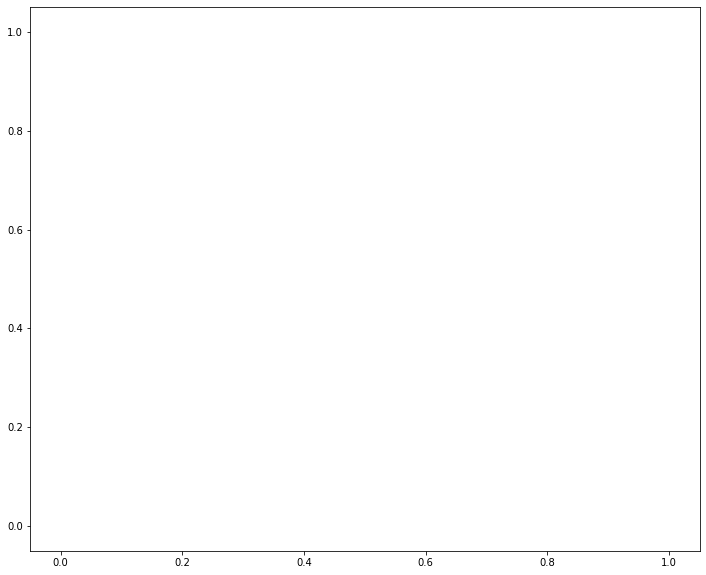

In [6]:
#plot Okubo-Weiss parameyter
#the plot in loop
proj=ccrs.PlateCarree()  
land_10m=cfeature.NaturalEarthFeature(category='physical',
                                      name='land',
                                      scale='10m',
                                      edgecolor='k',
                                      facecolor='lightgrey')
fig=plt.figure(figsize=(12,10))
ax1 = plt.plot(projection=proj)
gl=ax1.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl.xlabels_top = False
gl.ylabels_right = False
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabel_style = {'size': 14, 'color': 'black'}
gl.ylabel_style = {'size': 14, 'color': 'black'}
    #adding features
ax1.add_feature(land_10m)
    #Let's plot Bathymetry
ctf1 = ax1.pcolormesh(lon,lat,oku,cmap=plt.cm.get_cmap('seismic'),vmin=-1e-9,vmax=1e-9)
ax1.set_title('OKUbo-Weiss parameter-No Hanning Filter',fontsize=14)

#plot2
ax2 = plt.subplot(2, 2, 2, projection=proj)
gl2=ax2.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl2.xlabels_top = False
gl2.ylabels_right = False
gl2.xformatter = LONGITUDE_FORMATTER
gl2.yformatter = LATITUDE_FORMATTER
gl2.xlabel_style = {'size': 14, 'color': 'black'}
gl2.ylabel_style = {'size': 14, 'color': 'black'}
    #adding features
ax2.add_feature(land_10m)
    #Let's plot Bathymetry
ctf2 = ax2.pcolormesh(lon,lat,oku_h1,cmap=plt.cm.get_cmap('seismic'),vmin=-1e-9,vmax=1e-9)
ax2.set_title('OKUbo-Weiss parameter-1 Hanning Filter',fontsize=14)
cb     = plt.colorbar(ctf2,orientation='vertical')
cb.ax.tick_params(labelsize=14)
#plot3
ax3 = plt.subplot(2, 2, 3, projection=proj)
gl3=ax3.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl3.xlabels_top = False
gl3.ylabels_right = False
gl3.xformatter = LONGITUDE_FORMATTER
gl3.yformatter = LATITUDE_FORMATTER
gl3.xlabel_style = {'size': 14, 'color': 'black'}
gl3.ylabel_style = {'size': 14, 'color': 'black'}
    #adding features
ax3.add_feature(land_10m)
    #Let's plot Bathymetry
ctf3 = ax3.pcolormesh(lon,lat,oku_h5,cmap=plt.cm.get_cmap('seismic'),vmin=-1e-9,vmax=1e-9)
ax3.set_title('OKUbo-Weiss parameter-3 Hanning Filter',fontsize=14)
#plot4
ax4 = plt.subplot(2, 2, 4, projection=proj)
gl4=ax4.gridlines(linestyle=':',draw_labels=True)   #Add Gridlines
gl4.xlabels_top = False
gl4.ylabels_right = False
gl4.xformatter = LONGITUDE_FORMATTER
gl4.yformatter = LATITUDE_FORMATTER
gl4.xlabel_style = {'size': 14, 'color': 'black'}
gl4.ylabel_style = {'size': 14, 'color': 'black'}
    #adding features
ax4.add_feature(land_10m)
    #Let's plot Bathymetry
ctf4 = ax4.pcolormesh(lon,lat,oku_h5,cmap=plt.cm.get_cmap('seismic'),vmin=-1e-9,vmax=1e-9)
ax4.set_title('OKUbo-Weiss parameter-5 Hanning Filter',fontsize=14)
cb2     = plt.colorbar(ctf4,orientation='vertical')
cb2.ax.tick_params(labelsize=14)
fig.savefig("OKW_filters.png")